In [1]:
import copy 
import matplotlib.pyplot as plt
import mdptoolbox as mdpt
import numpy as np

In [2]:
class State:
    def __init__(self, state, length=2):
        self.state = np.array(state)
        self.terminal_length = length
    
    def __str__(self):
        res = ''
        for i in range(3):
            res += str(self.state[i])
        res += ','
        for i in range(3,6):
            res += str(self.state[i])
        res += ','
        res += str(self.state[6])
        return res
    
    def __setitem__(self, ind, val):
        self.state[ind] = val
        
    def __getitem__(self, ind):
        return self.state[ind]
    
    def isTerminal(self):
        return self.terminal_length in self.state[:3]

    def getHonestFork(self):
        return self.state[-1]
    
    def __eq__(self, other):
        return all(self.state == other.state)

In [3]:
# returns possible next states
def nextStates(cur_state):
    new_states = []
    
    # anyone mining on own fork.
    for i in range(3):
        temp = copy.deepcopy(cur_state)
        temp[i] += 1
        if i == 0:
            temp[3] += 1

        # new honest fork.
        if any(temp[:3] > temp[temp.getHonestFork()]):
            temp[-1] = np.argmax(temp[:3])

        new_states.append(temp)
    
    # anyone mining on another fork.
    for i in range(3):
        if cur_state[i] != 0:
            for j in range(3):
                if j != i:
                    temp = copy.deepcopy(cur_state)
                    temp[i] += 1
                    if j == 0:
                        temp[3+i] += 1

                    # new honest fork.
                    if any(temp[:3] > temp[temp.getHonestFork()]):
                        temp[-1] = np.argmax(temp[:3])

                    new_states.append(temp)
    return new_states

In [4]:
def checkIfInTotalStates(total_states, state):
    for s in total_states:
        if state == s:
            return True
    return False

In [5]:
# algorithm to enumerate possible states.
init_state = State([0,0,0,0,0,0,0], length=2)

total_states = [init_state]
states_to_process = [init_state]
while states_to_process:
    elem = states_to_process.pop()
    next_states = nextStates(elem)
    for s in next_states:
        if not checkIfInTotalStates(total_states, s):
            total_states.append(s)
        if not s.isTerminal() and not checkIfInTotalStates(states_to_process, s):
            states_to_process.append(s)

In [31]:
for s in total_states:
    if not s.isTerminal():
        print(s)

000,000,0
100,100,0
010,000,1
001,000,2
101,100,2
011,000,2
111,100,2
110,100,1
011,000,1
111,100,1
110,100,0
101,100,0
111,100,0


In [20]:
class Ind:
    def __init__(self, total_states):
        self.stringToInd = {}
        self.indToString = {}
        for i in range(len(total_states)):
            self.stringToInd[str(total_states[i])] = i
            self.indToString[i] = str(total_states[i])
    
    def i(self, string):
        return self.stringToInd[string]

    def s(self, ind):
        return self.indToString[ind]

In [202]:
si = Ind(total_states)

In [203]:
WHALE_REWARD = 2.0

In [204]:
transitions = np.zeros((2, len(total_states), len(total_states)))
rewards = np.zeros((2, len(total_states), len(total_states)))

# selfish
transitions[0, si.i('000,000,0'), si.i('100,100,0')] = 1/3
transitions[0, si.i('000,000,0'), si.i('010,000,1')] = 1/3
transitions[0, si.i('000,000,0'), si.i('001,000,2')] = 1/3
rewards[0, si.i('000,000,0'), si.i('100,100,0')] = -1/3
rewards[0, si.i('000,000,0'), si.i('010,000,1')] = -1/3
rewards[0, si.i('000,000,0'), si.i('001,000,2')] = -1/3

transitions[0, si.i('100,100,0'), si.i('200,200,0')] = 1/3
transitions[0, si.i('100,100,0'), si.i('110,100,0')] = 1/3
transitions[0, si.i('100,100,0'), si.i('101,100,0')] = 1/3
rewards[0, si.i('100,100,0'), si.i('200,200,0')] = WHALE_REWARD + 2 - 1/3
rewards[0, si.i('100,100,0'), si.i('110,100,0')] = -1/3
rewards[0, si.i('100,100,0'), si.i('101,100,0')] = -1/3

transitions[0, si.i('010,000,1'), si.i('110,100,1')] = 1/3
transitions[0, si.i('010,000,1'), si.i('020,000,1')] = 1/3
transitions[0, si.i('010,000,1'), si.i('011,000,1')] = 1/3
rewards[0, si.i('010,000,1'), si.i('110,100,1')] = -1/3
rewards[0, si.i('010,000,1'), si.i('020,000,1')] = -1/3
rewards[0, si.i('010,000,1'), si.i('011,000,1')] = -1/3

transitions[0, si.i('001,000,2'), si.i('101,100,2')] = 1/3
transitions[0, si.i('001,000,2'), si.i('011,000,2')] = 1/3
transitions[0, si.i('001,000,2'), si.i('002,000,2')] = 1/3
rewards[0, si.i('001,000,2'), si.i('101,100,2')] = -1/3
rewards[0, si.i('001,000,2'), si.i('011,000,2')] = -1/3
rewards[0, si.i('001,000,2'), si.i('002,000,2')] = -1/3

transitions[0, si.i('101,100,2'), si.i('201,200,0')] = 1/3
transitions[0, si.i('101,100,2'), si.i('111,100,2')] = 1/3
transitions[0, si.i('101,100,2'), si.i('102,100,2')] = 1/3
rewards[0, si.i('101,100,2'), si.i('201,200,0')] = WHALE_REWARD + 2 - 1/3
rewards[0, si.i('101,100,2'), si.i('111,100,2')] = -1/3
rewards[0, si.i('101,100,2'), si.i('102,100,2')] = -1/3

transitions[0, si.i('011,000,2'), si.i('111,100,2')] = 1/3
transitions[0, si.i('011,000,2'), si.i('021,000,1')] = 1/3
transitions[0, si.i('011,000,2'), si.i('012,000,2')] = 1/3
rewards[0, si.i('011,000,2'), si.i('111,100,2')] = -1/3
rewards[0, si.i('011,000,2'), si.i('021,000,1')] = -1/3
rewards[0, si.i('011,000,2'), si.i('012,000,2')] = -1/3

transitions[0, si.i('111,100,2'), si.i('211,200,0')] = 1/3
transitions[0, si.i('111,100,2'), si.i('121,100,1')] = 1/3
transitions[0, si.i('111,100,2'), si.i('112,100,2')] = 1/3
rewards[0, si.i('111,100,2'), si.i('211,200,0')] = WHALE_REWARD + 2 - 1/3
rewards[0, si.i('111,100,2'), si.i('121,100,1')] = -1/3
rewards[0, si.i('111,100,2'), si.i('112,100,2')] = -1/3

transitions[0, si.i('110,100,1'), si.i('210,200,0')] = 1/3
transitions[0, si.i('110,100,1'), si.i('120,100,1')] = 1/3
transitions[0, si.i('110,100,1'), si.i('111,100,1')] = 1/3
rewards[0, si.i('110,100,1'), si.i('210,200,0')] = WHALE_REWARD + 2 - 1/3
rewards[0, si.i('110,100,1'), si.i('120,100,1')] = -1/3
rewards[0, si.i('110,100,1'), si.i('111,100,1')] = -1/3

transitions[0, si.i('011,000,1'), si.i('111,100,1')] = 1/3
transitions[0, si.i('011,000,1'), si.i('021,000,1')] = 1/3
transitions[0, si.i('011,000,1'), si.i('012,000,2')] = 1/3
rewards[0, si.i('011,000,1'), si.i('111,100,1')] = -1/3
rewards[0, si.i('011,000,1'), si.i('021,000,1')] = -1/3
rewards[0, si.i('011,000,1'), si.i('012,000,2')] = -1/3

transitions[0, si.i('111,100,1'), si.i('211,200,0')] = 1/3
transitions[0, si.i('111,100,1'), si.i('121,100,1')] = 1/3
transitions[0, si.i('111,100,1'), si.i('112,100,2')] = 1/3
rewards[0, si.i('111,100,1'), si.i('211,200,0')] = WHALE_REWARD + 2 - 1/3
rewards[0, si.i('111,100,1'), si.i('121,100,1')] = -1/3
rewards[0, si.i('111,100,1'), si.i('112,100,2')] = -1/3

transitions[0, si.i('110,100,0'), si.i('210,200,0')] = 1/3
transitions[0, si.i('110,100,0'), si.i('120,100,1')] = 1/3
transitions[0, si.i('110,100,0'), si.i('111,100,0')] = 1/3
rewards[0, si.i('110,100,0'), si.i('210,200,0')] = WHALE_REWARD + 2 - 1/3
rewards[0, si.i('110,100,0'), si.i('120,100,1')] = -1/3
rewards[0, si.i('110,100,0'), si.i('111,100,0')] = -1/3

transitions[0, si.i('101,100,0'), si.i('201,200,0')] = 1/3
transitions[0, si.i('101,100,0'), si.i('111,100,0')] = 1/3
transitions[0, si.i('101,100,0'), si.i('102,100,2')] = 1/3
rewards[0, si.i('101,100,0'), si.i('201,200,0')] = WHALE_REWARD + 2 - 1/3
rewards[0, si.i('101,100,0'), si.i('111,100,0')] = -1/3
rewards[0, si.i('101,100,0'), si.i('102,100,2')] = -1/3

transitions[0, si.i('111,100,0'), si.i('211,200,0')] = 1/3
transitions[0, si.i('111,100,0'), si.i('121,100,1')] = 1/3
transitions[0, si.i('111,100,0'), si.i('112,100,2')] = 1/3
rewards[0, si.i('111,100,0'), si.i('211,200,0')] = WHALE_REWARD + 2 - 1/3
rewards[0, si.i('111,100,0'), si.i('121,100,1')] = -1/3
rewards[0, si.i('111,100,0'), si.i('112,100,2')] = -1/3

# honest
transitions[1, si.i('000,000,0'), si.i('100,100,0')] = 1/3
transitions[1, si.i('000,000,0'), si.i('010,000,1')] = 1/3
transitions[1, si.i('000,000,0'), si.i('001,000,2')] = 1/3
rewards[1, si.i('000,000,0'), si.i('100,100,0')] = -1/3
rewards[1, si.i('000,000,0'), si.i('010,000,1')] = -1/3
rewards[1, si.i('000,000,0'), si.i('001,000,2')] = -1/3

transitions[1, si.i('100,100,0'), si.i('200,200,0')] = 1/3
transitions[1, si.i('100,100,0'), si.i('110,100,0')] = 1/3
transitions[1, si.i('100,100,0'), si.i('101,100,0')] = 1/3
rewards[1, si.i('100,100,0'), si.i('200,200,0')] = WHALE_REWARD + 2 - 1/3
rewards[1, si.i('100,100,0'), si.i('110,100,0')] = -1/3
rewards[1, si.i('100,100,0'), si.i('101,100,0')] = -1/3

transitions[1, si.i('010,000,1'), si.i('020,010,1')] = 1/3
transitions[1, si.i('010,000,1'), si.i('020,000,1')] = 1/3
transitions[1, si.i('010,000,1'), si.i('011,000,1')] = 1/3
rewards[1, si.i('010,000,1'), si.i('020,010,1')] = 2/3
rewards[1, si.i('010,000,1'), si.i('020,000,1')] = -1/3
rewards[1, si.i('010,000,1'), si.i('011,000,1')] = -1/3

transitions[1, si.i('001,000,2'), si.i('002,001,2')] = 1/3
transitions[1, si.i('001,000,2'), si.i('011,000,2')] = 1/3
transitions[1, si.i('001,000,2'), si.i('002,000,2')] = 1/3
rewards[1, si.i('001,000,2'), si.i('002,001,2')] = 2/3
rewards[1, si.i('001,000,2'), si.i('011,000,2')] = -1/3
rewards[1, si.i('001,000,2'), si.i('002,000,2')] = -1/3

transitions[1, si.i('101,100,2'), si.i('102,101,2')] = 1/3
transitions[1, si.i('101,100,2'), si.i('111,100,2')] = 1/3
transitions[1, si.i('101,100,2'), si.i('102,100,2')] = 1/3
rewards[1, si.i('101,100,2'), si.i('102,101,2')] = 2/3
rewards[1, si.i('101,100,2'), si.i('111,100,2')] = -1/3
rewards[1, si.i('101,100,2'), si.i('102,100,2')] = -1/3

transitions[1, si.i('011,000,2'), si.i('012,001,2')] = 1/3
transitions[1, si.i('011,000,2'), si.i('021,000,1')] = 1/3
transitions[1, si.i('011,000,2'), si.i('012,000,2')] = 1/3
rewards[1, si.i('011,000,2'), si.i('012,001,2')] = 2/3
rewards[1, si.i('011,000,2'), si.i('021,000,1')] = -1/3
rewards[1, si.i('011,000,2'), si.i('012,000,2')] = -1/3

transitions[1, si.i('111,100,2'), si.i('112,101,2')] = 1/3
transitions[1, si.i('111,100,2'), si.i('121,100,1')] = 1/3
transitions[1, si.i('111,100,2'), si.i('112,100,2')] = 1/3
rewards[1, si.i('111,100,2'), si.i('112,101,2')] = 2/3
rewards[1, si.i('111,100,2'), si.i('121,100,1')] = -1/3
rewards[1, si.i('111,100,2'), si.i('112,100,2')] = -1/3

transitions[1, si.i('110,100,1'), si.i('120,110,1')] = 1/3
transitions[1, si.i('110,100,1'), si.i('120,100,1')] = 1/3
transitions[1, si.i('110,100,1'), si.i('111,100,1')] = 1/3
rewards[1, si.i('110,100,1'), si.i('120,110,1')] = 2/3
rewards[1, si.i('110,100,1'), si.i('120,100,1')] = -1/3
rewards[1, si.i('110,100,1'), si.i('111,100,1')] = -1/3

transitions[1, si.i('011,000,1'), si.i('021,010,1')] = 1/3
transitions[1, si.i('011,000,1'), si.i('021,000,1')] = 1/3
transitions[1, si.i('011,000,1'), si.i('012,000,2')] = 1/3
rewards[1, si.i('011,000,1'), si.i('021,010,1')] = 2/3
rewards[1, si.i('011,000,1'), si.i('021,000,1')] = -1/3
rewards[1, si.i('011,000,1'), si.i('012,000,2')] = -1/3

transitions[1, si.i('111,100,1'), si.i('121,110,1')] = 1/3
transitions[1, si.i('111,100,1'), si.i('121,100,1')] = 1/3
transitions[1, si.i('111,100,1'), si.i('112,100,2')] = 1/3
rewards[1, si.i('111,100,1'), si.i('121,110,1')] = 2/3
rewards[1, si.i('111,100,1'), si.i('121,100,1')] = -1/3
rewards[1, si.i('111,100,1'), si.i('112,100,2')] = -1/3

transitions[1, si.i('110,100,0'), si.i('210,200,0')] = 1/3
transitions[1, si.i('110,100,0'), si.i('120,100,1')] = 1/3
transitions[1, si.i('110,100,0'), si.i('111,100,0')] = 1/3
rewards[1, si.i('110,100,0'), si.i('210,200,0')] = WHALE_REWARD + 2 - 1/3
rewards[1, si.i('110,100,0'), si.i('120,100,1')] = -1/3
rewards[1, si.i('110,100,0'), si.i('111,100,0')] = -1/3

transitions[1, si.i('101,100,0'), si.i('201,200,0')] = 1/3
transitions[1, si.i('101,100,0'), si.i('111,100,0')] = 1/3
transitions[1, si.i('101,100,0'), si.i('102,100,2')] = 1/3
rewards[1, si.i('101,100,0'), si.i('201,200,0')] = WHALE_REWARD + 2 - 1/3
rewards[1, si.i('101,100,0'), si.i('111,100,0')] = -1/3
rewards[1, si.i('101,100,0'), si.i('102,100,2')] = -1/3

transitions[1, si.i('111,100,0'), si.i('211,200,0')] = 1/3
transitions[1, si.i('111,100,0'), si.i('121,100,1')] = 1/3
transitions[1, si.i('111,100,0'), si.i('112,100,2')] = 1/3
rewards[1, si.i('111,100,0'), si.i('211,200,0')] = WHALE_REWARD + 2 - 1/3
rewards[1, si.i('111,100,0'), si.i('121,100,1')] = -1/3
rewards[1, si.i('111,100,0'), si.i('112,100,2')] = -1/3

for i in range(len(total_states)):
    if total_states[i].isTerminal():
        transitions[0,i,i] = 1
        transitions[1,i,i] = 1

In [205]:
np.sum(transitions, axis=2)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]])

In [206]:
printTransitions(transitions, rewards, si)

000,000,0
     100,100,0  selfish, 0.33, -0.33
     010,000,1  selfish, 0.33, -0.33
     001,000,2  selfish, 0.33, -0.33
     100,100,0  honest, 0.33, -0.33
     010,000,1  honest, 0.33, -0.33
     001,000,2  honest, 0.33, -0.33
100,100,0
     200,200,0  selfish, 0.33, 3.67
     110,100,0  selfish, 0.33, -0.33
     101,100,0  selfish, 0.33, -0.33
     200,200,0  honest, 0.33, 3.67
     110,100,0  honest, 0.33, -0.33
     101,100,0  honest, 0.33, -0.33
010,000,1
     110,100,1  selfish, 0.33, -0.33
     020,000,1  selfish, 0.33, -0.33
     011,000,1  selfish, 0.33, -0.33
     020,000,1  honest, 0.33, -0.33
     011,000,1  honest, 0.33, -0.33
     020,010,1  honest, 0.33, 0.67
001,000,2
     101,100,2  selfish, 0.33, -0.33
     011,000,2  selfish, 0.33, -0.33
     002,000,2  selfish, 0.33, -0.33
     011,000,2  honest, 0.33, -0.33
     002,000,2  honest, 0.33, -0.33
     002,001,2  honest, 0.33, 0.67
101,100,2
     111,100,2  selfish, 0.33, -0.33
     201,200,0  selfish, 0.33, 3.67
     

In [207]:
def printTransitions(transitions, rewards, si):
    for i in range(len(total_states)):
        print(si.s(i))
        for j in range(len(total_states)):
            if transitions[0,i,j] != 0:
                print("    ", si.s(j), " selfish, {:0.2f}, {:0.2f}".format(
                    transitions[0,i,j], rewards[0,i,j]))
        for j in range(len(total_states)):
            if transitions[1,i,j] != 0:
                print("    ", si.s(j), " honest, {:0.2f}, {:0.2f}".format(
                    transitions[1,i,j], rewards[1,i,j]))
                
def prettyPrintPolicy(policy, si):
    for i in range(len(policy)):
        print(si.s(i), end=' ')
        if policy[i] == 0:
            print('selfish')
        else:
            print('honest')

In [208]:
val_iter = mdpt.mdp.ValueIteration(transitions, rewards, discount=1)
val_iter.run()
policy = val_iter.policy

In [209]:
prettyPrintPolicy(policy, si)

000,000,0 selfish
100,100,0 selfish
010,000,1 selfish
001,000,2 selfish
101,100,2 selfish
011,000,2 honest
002,000,2 selfish
002,001,2 selfish
111,100,2 selfish
021,000,1 selfish
012,000,2 selfish
021,010,1 selfish
012,001,2 selfish
211,200,0 selfish
121,100,1 selfish
112,100,2 selfish
211,100,0 selfish
121,110,1 selfish
112,101,2 selfish
201,200,0 selfish
102,100,2 selfish
201,100,0 selfish
102,101,2 selfish
110,100,1 selfish
020,000,1 selfish
011,000,1 honest
020,010,1 selfish
111,100,1 selfish
210,200,0 selfish
120,100,1 selfish
210,100,0 selfish
120,110,1 selfish
200,200,0 selfish
110,100,0 selfish
101,100,0 selfish
200,100,0 selfish
111,100,0 selfish


In [213]:
new_t = np.zeros((2, len(total_states), len(total_states)))
new_r = np.zeros((2, len(total_states), len(total_states)))

# selfish
new_t[0, si.i('000,000,0'), si.i('100,100,0')] = 1/3
new_t[0, si.i('000,000,0'), si.i('010,000,1')] = 1/3
new_t[0, si.i('000,000,0'), si.i('001,000,2')] = 1/3
new_r[0, si.i('000,000,0'), si.i('100,100,0')] = -1/3
new_r[0, si.i('000,000,0'), si.i('010,000,1')] = -1/3
new_r[0, si.i('000,000,0'), si.i('001,000,2')] = -1/3

new_t[0, si.i('100,100,0'), si.i('200,200,0')] = 1/3
new_t[0, si.i('100,100,0'), si.i('110,100,0')] = 1/3
new_t[0, si.i('100,100,0'), si.i('101,100,0')] = 1/3
new_r[0, si.i('100,100,0'), si.i('200,200,0')] = WHALE_REWARD + 2 - 1/3
new_r[0, si.i('100,100,0'), si.i('110,100,0')] = -1/3
new_r[0, si.i('100,100,0'), si.i('101,100,0')] = -1/3

new_t[0, si.i('010,000,1'), si.i('110,100,1')] = 1/3
new_t[0, si.i('010,000,1'), si.i('020,000,1')] = 1/3
new_t[0, si.i('010,000,1'), si.i('011,000,1')] = 1/3
new_r[0, si.i('010,000,1'), si.i('110,100,1')] = -1/3
new_r[0, si.i('010,000,1'), si.i('020,000,1')] = -1/3
new_r[0, si.i('010,000,1'), si.i('011,000,1')] = -1/3

new_t[0, si.i('001,000,2'), si.i('101,100,2')] = 1/3
new_t[0, si.i('001,000,2'), si.i('011,000,2')] = 1/3
new_t[0, si.i('001,000,2'), si.i('002,000,2')] = 1/3
new_r[0, si.i('001,000,2'), si.i('101,100,2')] = -1/3
new_r[0, si.i('001,000,2'), si.i('011,000,2')] = -1/3
new_r[0, si.i('001,000,2'), si.i('002,000,2')] = -1/3

# **
new_t[0, si.i('101,100,2'), si.i('201,200,0')] = 1/3
new_t[0, si.i('101,100,2'), si.i('102,100,2')] = 2/3
new_r[0, si.i('101,100,2'), si.i('201,200,0')] = WHALE_REWARD + 2 - 1/3
new_r[0, si.i('101,100,2'), si.i('102,100,2')] = -1/3

new_t[0, si.i('011,000,2'), si.i('111,100,2')] = 1/3
new_t[0, si.i('011,000,2'), si.i('021,000,1')] = 1/3
new_t[0, si.i('011,000,2'), si.i('012,000,2')] = 1/3
new_r[0, si.i('011,000,2'), si.i('111,100,2')] = -1/3
new_r[0, si.i('011,000,2'), si.i('021,000,1')] = -1/3
new_r[0, si.i('011,000,2'), si.i('012,000,2')] = -1/3

new_t[0, si.i('111,100,2'), si.i('211,200,0')] = 1/3
new_t[0, si.i('111,100,2'), si.i('121,100,1')] = 1/3
new_t[0, si.i('111,100,2'), si.i('112,100,2')] = 1/3
new_r[0, si.i('111,100,2'), si.i('211,200,0')] = WHALE_REWARD + 2 - 1/3
new_r[0, si.i('111,100,2'), si.i('121,100,1')] = -1/3
new_r[0, si.i('111,100,2'), si.i('112,100,2')] = -1/3

# **
new_t[0, si.i('110,100,1'), si.i('210,200,0')] = 1/3
new_t[0, si.i('110,100,1'), si.i('120,100,1')] = 2/3
new_r[0, si.i('110,100,1'), si.i('210,200,0')] = WHALE_REWARD + 2 - 1/3
new_r[0, si.i('110,100,1'), si.i('120,100,1')] = -1/3

new_t[0, si.i('011,000,1'), si.i('111,100,1')] = 1/3
new_t[0, si.i('011,000,1'), si.i('021,000,1')] = 1/3
new_t[0, si.i('011,000,1'), si.i('012,000,2')] = 1/3
new_r[0, si.i('011,000,1'), si.i('111,100,1')] = -1/3
new_r[0, si.i('011,000,1'), si.i('021,000,1')] = -1/3
new_r[0, si.i('011,000,1'), si.i('012,000,2')] = -1/3

new_t[0, si.i('111,100,1'), si.i('211,200,0')] = 1/3
new_t[0, si.i('111,100,1'), si.i('121,100,1')] = 1/3
new_t[0, si.i('111,100,1'), si.i('112,100,2')] = 1/3
new_r[0, si.i('111,100,1'), si.i('211,200,0')] = WHALE_REWARD + 2 - 1/3
new_r[0, si.i('111,100,1'), si.i('121,100,1')] = -1/3
new_r[0, si.i('111,100,1'), si.i('112,100,2')] = -1/3

# **
new_t[0, si.i('110,100,0'), si.i('210,200,0')] = 1/3
new_t[0, si.i('110,100,0'), si.i('120,100,1')] = 1/3
new_t[0, si.i('110,100,0'), si.i('210,100,0')] = 1/3
new_r[0, si.i('110,100,0'), si.i('210,200,0')] = WHALE_REWARD + 2 - 1/3
new_r[0, si.i('110,100,0'), si.i('120,100,1')] = -1/3
new_r[0, si.i('110,100,0'), si.i('210,100,0')] = WHALE_REWARD + 1 - 1/3

# **
new_t[0, si.i('101,100,0'), si.i('201,200,0')] = 1/3
new_t[0, si.i('101,100,0'), si.i('201,100,0')] = 1/3
new_t[0, si.i('101,100,0'), si.i('102,100,2')] = 1/3
new_r[0, si.i('101,100,0'), si.i('201,200,0')] = WHALE_REWARD + 2 - 1/3
new_r[0, si.i('101,100,0'), si.i('201,100,0')] = WHALE_REWARD + 1 - 1/3
new_r[0, si.i('101,100,0'), si.i('102,100,2')] = -1/3

new_t[0, si.i('111,100,0'), si.i('211,200,0')] = 1/3
new_t[0, si.i('111,100,0'), si.i('121,100,1')] = 1/3
new_t[0, si.i('111,100,0'), si.i('112,100,2')] = 1/3
new_r[0, si.i('111,100,0'), si.i('211,200,0')] = WHALE_REWARD + 2 - 1/3
new_r[0, si.i('111,100,0'), si.i('121,100,1')] = -1/3
new_r[0, si.i('111,100,0'), si.i('112,100,2')] = -1/3

# honest
new_t[1, si.i('000,000,0'), si.i('100,100,0')] = 1/3
new_t[1, si.i('000,000,0'), si.i('010,000,1')] = 1/3
new_t[1, si.i('000,000,0'), si.i('001,000,2')] = 1/3
new_r[1, si.i('000,000,0'), si.i('100,100,0')] = -1/3
new_r[1, si.i('000,000,0'), si.i('010,000,1')] = -1/3
new_r[1, si.i('000,000,0'), si.i('001,000,2')] = -1/3

new_t[1, si.i('100,100,0'), si.i('200,200,0')] = 1/3
new_t[1, si.i('100,100,0'), si.i('110,100,0')] = 1/3
new_t[1, si.i('100,100,0'), si.i('101,100,0')] = 1/3
new_r[1, si.i('100,100,0'), si.i('200,200,0')] = WHALE_REWARD + 2 - 1/3
new_r[1, si.i('100,100,0'), si.i('110,100,0')] = -1/3
new_r[1, si.i('100,100,0'), si.i('101,100,0')] = -1/3

new_t[1, si.i('010,000,1'), si.i('020,010,1')] = 1/3
new_t[1, si.i('010,000,1'), si.i('020,000,1')] = 1/3
new_t[1, si.i('010,000,1'), si.i('011,000,1')] = 1/3
new_r[1, si.i('010,000,1'), si.i('020,010,1')] = 2/3
new_r[1, si.i('010,000,1'), si.i('020,000,1')] = -1/3
new_r[1, si.i('010,000,1'), si.i('011,000,1')] = -1/3

new_t[1, si.i('001,000,2'), si.i('002,001,2')] = 1/3
new_t[1, si.i('001,000,2'), si.i('011,000,2')] = 1/3
new_t[1, si.i('001,000,2'), si.i('002,000,2')] = 1/3
new_r[1, si.i('001,000,2'), si.i('002,001,2')] = 2/3
new_r[1, si.i('001,000,2'), si.i('011,000,2')] = -1/3
new_r[1, si.i('001,000,2'), si.i('002,000,2')] = -1/3

# **
new_t[1, si.i('101,100,2'), si.i('102,101,2')] = 2/3
new_t[1, si.i('101,100,2'), si.i('102,100,2')] = 1/3
new_r[1, si.i('101,100,2'), si.i('102,101,2')] = 2/3
new_r[1, si.i('101,100,2'), si.i('102,100,2')] = -1/3

new_t[1, si.i('011,000,2'), si.i('012,001,2')] = 1/3
new_t[1, si.i('011,000,2'), si.i('021,000,1')] = 1/3
new_t[1, si.i('011,000,2'), si.i('012,000,2')] = 1/3
new_r[1, si.i('011,000,2'), si.i('012,001,2')] = 2/3
new_r[1, si.i('011,000,2'), si.i('021,000,1')] = -1/3
new_r[1, si.i('011,000,2'), si.i('012,000,2')] = -1/3

new_t[1, si.i('111,100,2'), si.i('112,101,2')] = 1/3
new_t[1, si.i('111,100,2'), si.i('121,100,1')] = 1/3
new_t[1, si.i('111,100,2'), si.i('112,100,2')] = 1/3
new_r[1, si.i('111,100,2'), si.i('112,101,2')] = 2/3
new_r[1, si.i('111,100,2'), si.i('121,100,1')] = -1/3
new_r[1, si.i('111,100,2'), si.i('112,100,2')] = -1/3

# **
new_t[1, si.i('110,100,1'), si.i('120,110,1')] = 1/3
new_t[1, si.i('110,100,1'), si.i('120,100,1')] = 2/3
new_r[1, si.i('110,100,1'), si.i('120,110,1')] = 2/3
new_r[1, si.i('110,100,1'), si.i('120,100,1')] = -1/3

new_t[1, si.i('011,000,1'), si.i('021,010,1')] = 1/3
new_t[1, si.i('011,000,1'), si.i('021,000,1')] = 1/3
new_t[1, si.i('011,000,1'), si.i('012,000,2')] = 1/3
new_r[1, si.i('011,000,1'), si.i('021,010,1')] = 2/3
new_r[1, si.i('011,000,1'), si.i('021,000,1')] = -1/3
new_r[1, si.i('011,000,1'), si.i('012,000,2')] = -1/3

new_t[1, si.i('111,100,1'), si.i('121,110,1')] = 1/3
new_t[1, si.i('111,100,1'), si.i('121,100,1')] = 1/3
new_t[1, si.i('111,100,1'), si.i('112,100,2')] = 1/3
new_r[1, si.i('111,100,1'), si.i('121,110,1')] = 2/3
new_r[1, si.i('111,100,1'), si.i('121,100,1')] = -1/3
new_r[1, si.i('111,100,1'), si.i('112,100,2')] = -1/3

# **
new_t[1, si.i('110,100,0'), si.i('210,200,0')] = 1/3
new_t[1, si.i('110,100,0'), si.i('120,100,1')] = 1/3
new_t[1, si.i('110,100,0'), si.i('210,100,0')] = 1/3
new_r[1, si.i('110,100,0'), si.i('210,200,0')] = WHALE_REWARD + 2 - 1/3
new_r[1, si.i('110,100,0'), si.i('120,100,1')] = -1/3
new_r[1, si.i('110,100,0'), si.i('210,100,0')] = WHALE_REWARD + 1 - 1/3

# **
new_t[1, si.i('101,100,0'), si.i('201,200,0')] = 1/3
new_t[1, si.i('101,100,0'), si.i('201,100,0')] = 1/3
new_t[1, si.i('101,100,0'), si.i('102,100,2')] = 1/3
new_r[1, si.i('101,100,0'), si.i('201,200,0')] = WHALE_REWARD + 2 - 1/3
new_r[1, si.i('101,100,0'), si.i('201,100,0')] = WHALE_REWARD + 1 - 1/3
new_r[1, si.i('101,100,0'), si.i('102,100,2')] = -1/3

new_t[1, si.i('111,100,0'), si.i('211,200,0')] = 1/3
new_t[1, si.i('111,100,0'), si.i('121,100,1')] = 1/3
new_t[1, si.i('111,100,0'), si.i('112,100,2')] = 1/3
new_r[1, si.i('111,100,0'), si.i('211,200,0')] = WHALE_REWARD + 2 - 1/3
new_r[1, si.i('111,100,0'), si.i('121,100,1')] = -1/3
new_r[1, si.i('111,100,0'), si.i('112,100,2')] = -1/3

for i in range(len(total_states)):
    if total_states[i].isTerminal():
        new_t[0,i,i] = 1
        new_t[1,i,i] = 1

In [214]:
np.sum(new_t, axis=2)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]])

In [215]:
printTransitions(new_t, new_r, si)

000,000,0
     100,100,0  selfish, 0.33, -0.33
     010,000,1  selfish, 0.33, -0.33
     001,000,2  selfish, 0.33, -0.33
     100,100,0  honest, 0.33, -0.33
     010,000,1  honest, 0.33, -0.33
     001,000,2  honest, 0.33, -0.33
100,100,0
     200,200,0  selfish, 0.33, 3.67
     110,100,0  selfish, 0.33, -0.33
     101,100,0  selfish, 0.33, -0.33
     200,200,0  honest, 0.33, 3.67
     110,100,0  honest, 0.33, -0.33
     101,100,0  honest, 0.33, -0.33
010,000,1
     110,100,1  selfish, 0.33, -0.33
     020,000,1  selfish, 0.33, -0.33
     011,000,1  selfish, 0.33, -0.33
     020,000,1  honest, 0.33, -0.33
     011,000,1  honest, 0.33, -0.33
     020,010,1  honest, 0.33, 0.67
001,000,2
     101,100,2  selfish, 0.33, -0.33
     011,000,2  selfish, 0.33, -0.33
     002,000,2  selfish, 0.33, -0.33
     011,000,2  honest, 0.33, -0.33
     002,000,2  honest, 0.33, -0.33
     002,001,2  honest, 0.33, 0.67
101,100,2
     201,200,0  selfish, 0.33, 3.67
     102,100,2  selfish, 0.67, -0.33
     

In [216]:
val_iter = mdpt.mdp.ValueIteration(new_t, new_r, discount=1)
val_iter.run()
policy = val_iter.policy

In [217]:
prettyPrintPolicy(policy, si)

000,000,0 selfish
100,100,0 selfish
010,000,1 honest
001,000,2 honest
101,100,2 selfish
011,000,2 honest
002,000,2 selfish
002,001,2 selfish
111,100,2 selfish
021,000,1 selfish
012,000,2 selfish
021,010,1 selfish
012,001,2 selfish
211,200,0 selfish
121,100,1 selfish
112,100,2 selfish
211,100,0 selfish
121,110,1 selfish
112,101,2 selfish
201,200,0 selfish
102,100,2 selfish
201,100,0 selfish
102,101,2 selfish
110,100,1 selfish
020,000,1 selfish
011,000,1 honest
020,010,1 selfish
111,100,1 selfish
210,200,0 selfish
120,100,1 selfish
210,100,0 selfish
120,110,1 selfish
200,200,0 selfish
110,100,0 selfish
101,100,0 selfish
200,100,0 selfish
111,100,0 selfish


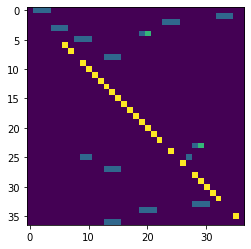

In [95]:
plt.imshow(new_t[0])